# Step 1: Import Libraries
In this step, we import the essential libraries needed for data analysis and visualization. 
We will be using:
- `pandas` for data manipulation,
- `matplotlib` and `seaborn` for data visualization, and
- `sklearn` for statistical modeling (regression analyis).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression

# Step 2: Load and Explore the Dataset
Here, we load the dataset and inspect its structure. This will help us understand what kind of data we are dealing with and its characteristics.


In [57]:
data = pd.read_csv("dailyActivity_merged.csv")

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

In [63]:
data.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,4.570000e+02,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,4.628595e+09,6546.562363,4.663523,4.609847,0.179427,1.180897,0.478643,2.890197,0.001904,16.623632,13.070022,170.070022,995.282276,2189.452954
std,2.293781e+09,5398.493064,4.082072,4.068540,0.849232,2.487159,0.830995,2.237523,0.008487,28.919704,36.208635,122.205372,337.021404,815.484523
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,2.347168e+09,1988.000000,1.410000,1.280000,0.000000,0.000000,0.000000,0.870000,0.000000,0.000000,0.000000,64.000000,728.000000,1776.000000
50%,4.057193e+09,5986.000000,4.090000,4.090000,0.000000,0.000000,0.020000,2.930000,0.000000,0.000000,1.000000,181.000000,1057.000000,2062.000000
75%,6.391747e+09,10198.000000,7.160000,7.110000,0.000000,1.310000,0.670000,4.460000,0.000000,25.000000,16.000000,257.000000,1285.000000,2667.000000
max,8.877689e+09,28497.000000,27.530001,27.530001,6.727057,21.920000,6.400000,12.510000,0.100000,202.000000,660.000000,720.000000,1440.000000,4562.000000


# Step 3: Data Cleaning
Before performing any analysis, it is important to clean the dataset by checking for missing values, removing duplicates, and handling any inconsistencies.


In [65]:
data.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [67]:
data.duplicated().sum()

0

In [69]:
data.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [71]:
data['Id'] = data['Id'].astype(str)

In [73]:
data['ActivityDate'] = pd.to_datetime(data['ActivityDate'])

In [196]:
data.dtypes

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
TotalActiveMinutes                   int64
DayOfWeek                           object
Week                                UInt32
dtype: object

# Step 4: Data Visualization
In this section, we visualize key metrics such as total steps, calories burned, and time spent in different activity levels using various plots.


In [79]:
# New Metrics
data['TotalActiveMinutes'] = data['VeryActiveMinutes']+data['FairlyActiveMinutes']+data['LightlyActiveMinutes']

In [85]:
# Grouping by date to get daily totals
daily_summary = data.groupby('ActivityDate').sum()

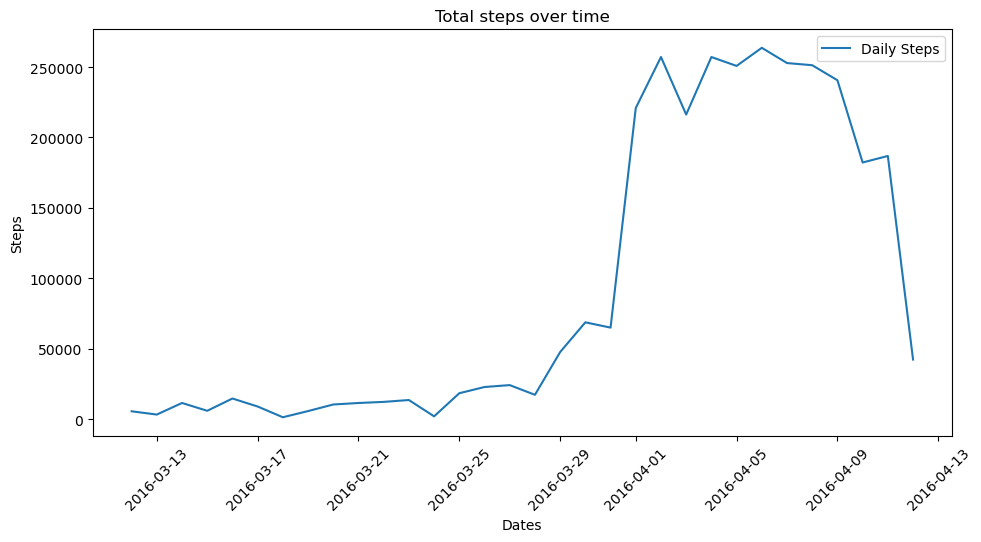

In [101]:
# Daily steps over time
plt.figure(figsize=(10,5))

plt.plot(daily_summary.index, daily_summary['TotalSteps'], label = 'Daily Steps')
plt.title('Total steps over time')
plt.xlabel('Dates')
plt.ylabel('Steps')
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


# Step 5: Correlation Analysis
We use a correlation matrix to understand the relationships between different variables in the dataset. This will help us identify which variables are strongly related.


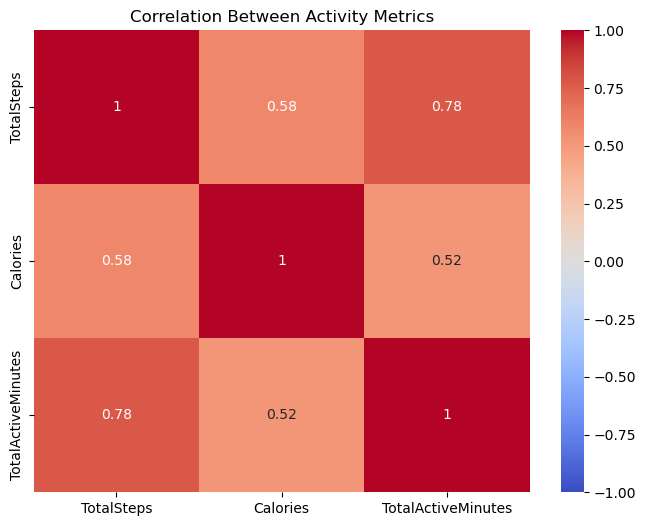

In [127]:
correlation_matrix = data[['TotalSteps','Calories','TotalActiveMinutes']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin= -1, vmax = 1)

plt.title('Correlation Between Activity Metrics')
plt.show()

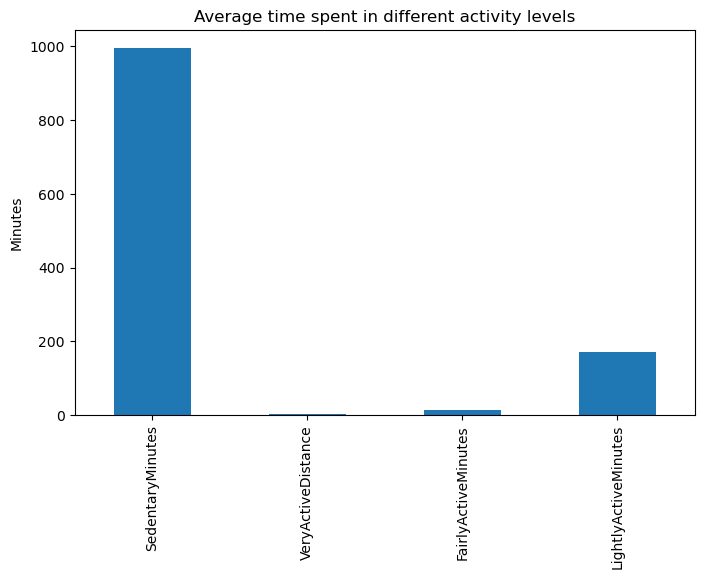

In [147]:
activity_levels = ['SedentaryMinutes','VeryActiveDistance','FairlyActiveMinutes','LightlyActiveMinutes']

# Plot a bar chart for total time in each activity level
data[activity_levels].mean().plot(kind='bar', figsize=(8,5))
plt.title('Average time spent in different activity levels')
plt.ylabel('Minutes')
plt.show()

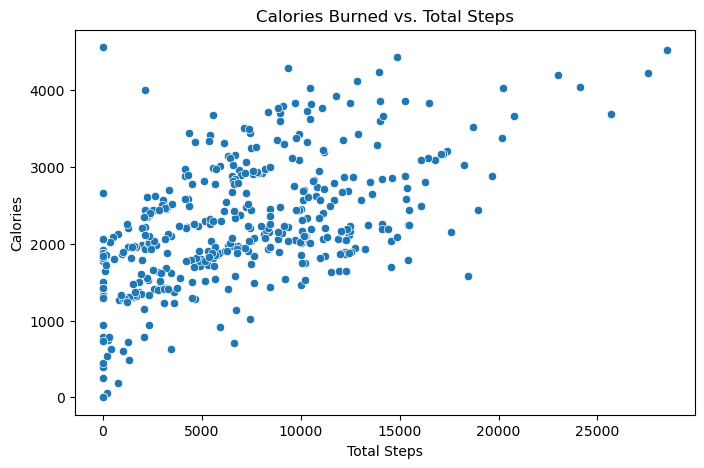

In [173]:
plt.figure(figsize=(8,5))

sns.scatterplot(x='TotalSteps', y='Calories', data=data)
plt.title("Calories Burned vs. Total Steps")
plt.xlabel("Total Steps")
plt.ylabel('Calories')
plt.show()

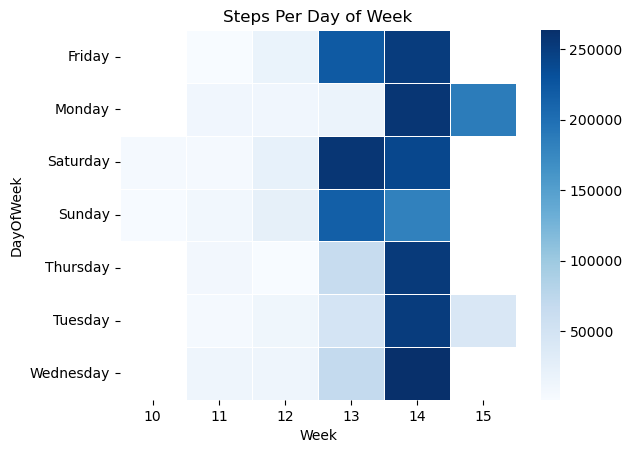

In [169]:
data['DayOfWeek'] = data['ActivityDate'].dt.day_name()
data['Week'] = data['ActivityDate'].dt.isocalendar().week

weekly_steps = data.pivot_table(values = 'TotalSteps', index = 'DayOfWeek', columns = 'Week', aggfunc= 'sum')

sns.heatmap(weekly_steps, cmap = 'Blues', linewidth = 0.5)
plt.title('Steps Per Day of Week')
plt.show()

# Step 6: Statistical Analysis
In this section, we perform a simple linear regression analysis to predict calories burned based on the number of steps taken.


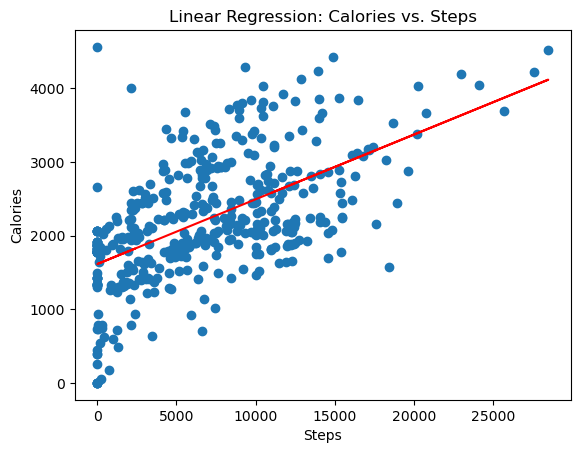

In [190]:
X = data[['TotalSteps']]
y = data['Calories']

model = LinearRegression()

model.fit(X,y)

y_pred = model.predict(X)
plt.scatter(X,y)
plt.plot(X, y_pred, color='Red')
plt.title('Linear Regression: Calories vs. Steps')
plt.xlabel('Steps')
plt.ylabel('Calories')
plt.show()

# Step 7: Conclusion and Summary
In this final step, we summarize our findings from the data analysis and visualizations, providing key insights such as trends and relationships between variables.


- **Steps vs Calories**: The analysis shows a strong correlation between steps taken and calories burned.
- **Activity Breakdown**: Users spend the majority of their time in sedentary activities.
- **Recommendations**: Increasing daily steps by 15% can significantly improve calorie burn.
